# Car Price Prediction


data regarding some attributes of cars has been gathered in this dataset, there will be assessments implemented on this data and the attributes with the highest correlation will be used to train the model and predict the car prices based on them.

every record has 5 attributes and 1 label(price) as below:

input variables

1-name

2-year

3-miles

4-color

5-condition

output variable

1-price

two different models will be used in this notebook to predict the price of cars based on the above attributes, one will be neural network MLP regressor and the other one will be linear regression model.

In [46]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns

In [47]:
dataset = pd.read_csv('./car_web_scraped_dataset.csv')
dataset

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


since most of the attributes in the dataset are categorical not numerical it will be necessary to convert them first.

In [48]:
dataset['miles'] = dataset['miles'].str.extract('(\d+)', expand=False)
dataset['miles'] = dataset['miles'].str.replace(',', '').astype(int)


In [49]:
dataset['price'] = dataset['price'].str.replace(',', '')
dataset['price'] = dataset['price'].str.extract('(\d+)', expand=False)

In [50]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(dataset[['color']])
dataset['color'] = encoder.transform(dataset[['color']])
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(dataset[['condition']])
dataset['condition'] = encoder.transform(dataset[['condition']])


In [51]:
dataset

,name,year,miles,color,condition,price
0,Kia Forte,2022,41,19.0,18.0,15988
1,Chevrolet Silverado 1500,2021,15,54.0,0.0,38008
2,Toyota RAV4,2022,32,45.0,18.0,24988
3,Honda Civic,2020,37,8.0,18.0,18998
4,Honda Civic,2020,27,1.0,18.0,19498
...,...,...,...,...,...,...
2835,Ford Escape,2013,98,45.0,7.0,8995
2836,Mercedes-Benz R-Class,2009,120,1.0,2.0,9495
2837,Mercedes-Benz GLC,2022,27,22.0,19.0,29999
2838,Honda CR-V,2021,50,24.0,18.0,22992


the second thing to do here is to plot the distribution to find out whether data needs to be normalised.

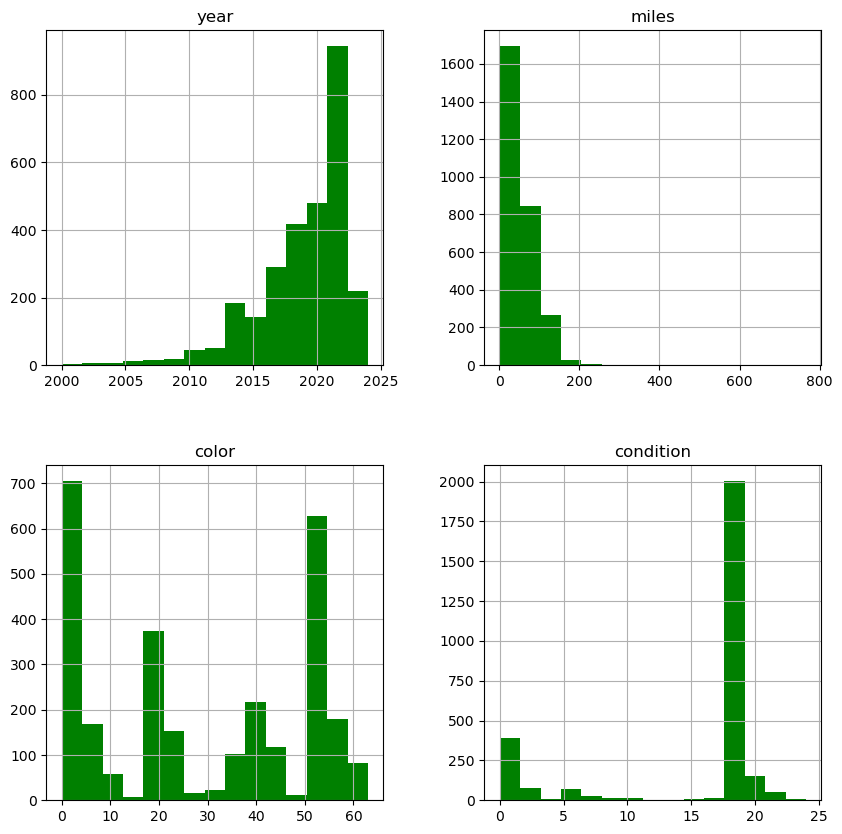

In [52]:
dataset.hist(bins=15 ,figsize=(10,10), color = 'Green')
plt.show()